In [5]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [9]:
df = pd.read_csv('./data/allbd＿by12month.csv')
df.head()

,date,area,bd_name,loop,type,Usage
0,2017/08,北區,體育館,主迴路,行政,39249.63
1,2017/08,北區,體育館,司令台,行政,1757.34
2,2017/08,北區,體育館,籃排球場,行政,949.59
3,2017/08,北區,環保大樓,主迴路,教學,73856.03
4,2017/08,南區,機車Ｈ棚,主迴路,行政,0.00


In [19]:
df.describe()

,Usage
count,1.228000e+03
mean,2.008185e+06
std,2.227297e+07
min,0.000000e+00
25%,1.561208e+03
50%,1.489160e+04
75%,7.130383e+04
max,5.545394e+08


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 6 columns):
date       1228 non-null object
area       1228 non-null object
bd_name    1228 non-null object
loop       1228 non-null object
type       1228 non-null object
Usage      1228 non-null float64
dtypes: float64(1), object(5)
memory usage: 57.6+ KB
None


In [11]:
#檢查有沒有缺值
#dinninghall2,ActivityCenter  好像有缺
df.bd_name.value_counts()

第二餐廳                    178
活動中心                    116
綜合一館                     94
女二舍                      84
學生十三舍                    48
電資大樓                     48
體育館                      36
中正堂                      36
學生十舍                     24
圖資中心                     24
學生七舍                     24
資訊館(北區)                  24
管理一館                     12
工程一館中繼                   12
機車Ａ棚                     12
人社一館                     12
機車Ｄ棚                     12
資訊館(南區)                  12
工程四館                     12
學生七舍_八舍                  12
學生八舍                     12
學生十一舍_研一舍                12
游泳館                      12
研究生一舍                    12
工程五館                     12
工程二館                     12
第一招待所                    12
人社二館                     12
防災中心                     12
土木結構                     12
學生九舍                     12
行政大樓                     12
材料實驗                     12
機車Ｈ棚                     12
南區總電站                    12
綜合球館                

In [27]:
df[df.Usage ==0].count() #找哪些

date       101
area       101
bd_name    101
loop       101
type       101
Usage      101
dtype: int64

In [28]:
df[df.Usage <= 100].count() #找哪些

date       113
area       113
bd_name    113
loop       113
type       113
Usage      113
dtype: int64

In [39]:
df.Usage.nlargest(20)
df[df.Usage>40000000]

,date,area,bd_name,loop,type,Usage
382,2017/05,南區,南區總電站,,電站,294461000.0
788,2017/01,南區,南區總電站,,電站,294461000.0
941,2016/11,南區,綜合一館,空大ML燈力,外租,554539400.0
982,2016/11,北區,活動中心,第一餐聽,外租,117636700.0
1044,2016/10,南區,綜合一館,空大ML燈力,外租,245510500.0
1131,2016/09,南區,機車Ａ棚,主迴路,行政,175697100.0
1147,2016/09,南區,綜合一館,空大ML燈力,外租,114470900.0
1188,2016/09,北區,活動中心,第一餐聽,外租,90420140.0


In [45]:
#扣掉缺值\過大值
df1 = df[df.Usage > 0]
df1 = df1[df1.Usage < 40000000]
df1.describe()


,Usage
count,1.119000e+03
mean,5.172964e+05
std,2.346928e+06
min,2.241000e+01
25%,2.364720e+03
50%,1.858363e+04
75%,8.155650e+04
max,3.127753e+07


In [60]:
#df2 把缺值離群值補成平均值
mean =  df1.Usage.mean()
df2 = df
df2 = df2.replace(0.0,mean)
df2 = df2[df2.Usage > 40000000] = mean

#df2 = df2.replace(613240.9,mean)
df2.describe()

,Usage
count,1.228000e+03
mean,5.172964e+05
std,2.240260e+06
min,2.241000e+01
25%,3.027140e+03
50%,2.436569e+04
75%,1.829971e+05
max,3.127753e+07


In [54]:
print(df.shape,df1.shape,df2.shape)
#df2 讚讚

(1228, 6) (1119, 6) (1228, 6)


In [59]:
df2.Usage.nlargest(n=10)

941     554539400.0
382     294461000.0
788     294461000.0
1044    245510500.0
1131    175697100.0
982     117636700.0
1147    114470900.0
1188     90420140.0
1225     31277530.0
749      23432220.0
Name: Usage, dtype: float64

Axes(0.125,0.125;0.775x0.775)


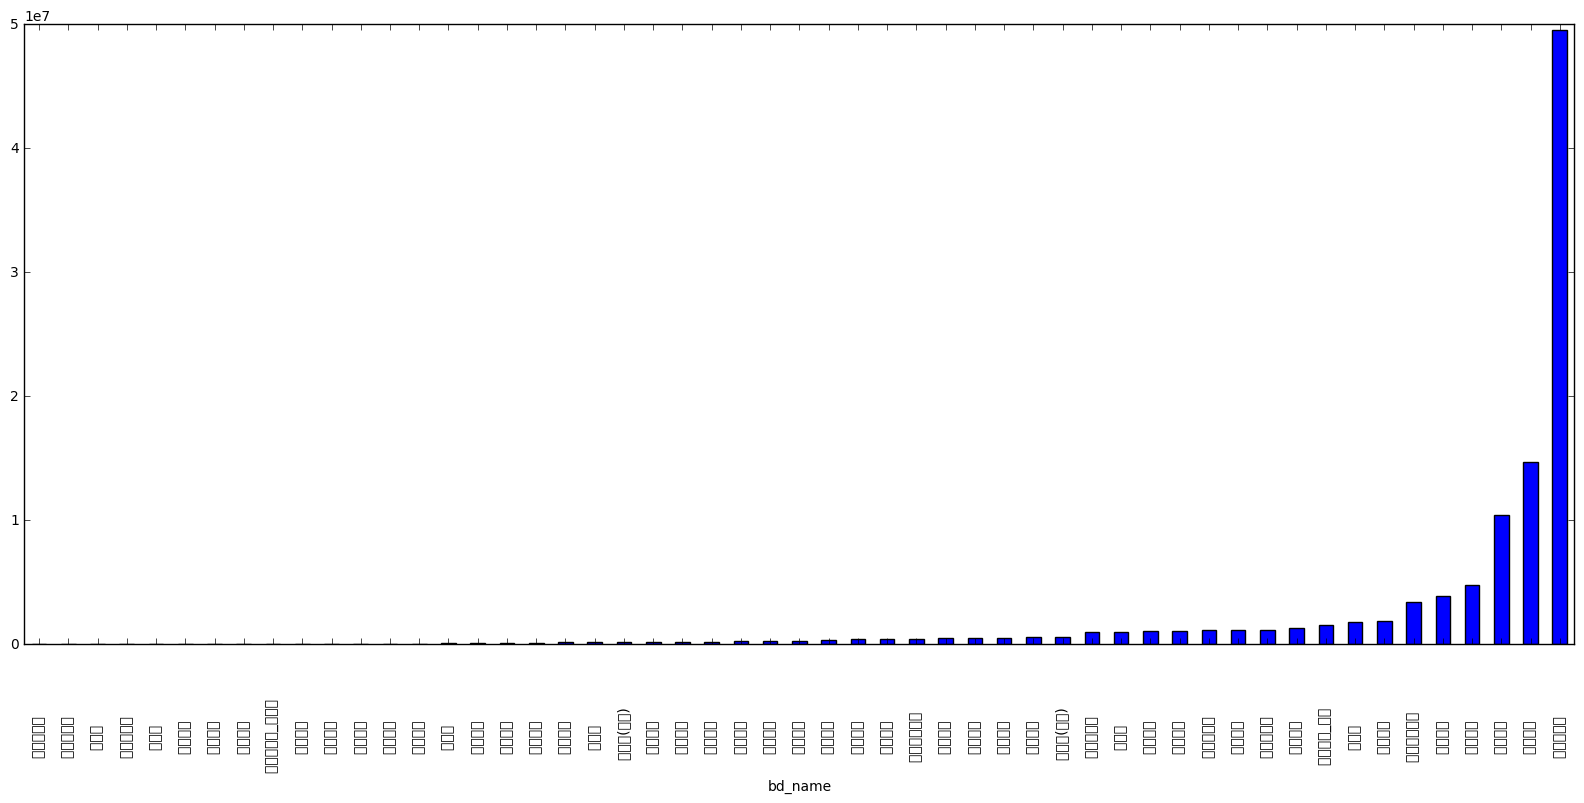

In [56]:
#每個月的用電量
#print(df1.groupby('bd_name').mean().plot.bar()) #沒排序版本
print(df2.groupby('bd_name').mean().sort_values('Usage')['Usage'].plot.bar())

SyntaxError: unexpected EOF while parsing (<ipython-input-12-151b05c89c10>, line 1)